# Python for Data Analysis

In [295]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In this project we'll try to see how we can determine the class of a solar flare.  <br>
We're given a set of data representing the solar flare happening. <br>
Each row of the database represents differents feature of 1 active region of the sun

## Import dataset

We have 2 datasets, but the "flare.data2 " file contains less errors and is therefore considered more reliable.
That's why for most of our analysis we will use data2 instead of data1

Here we're importing the .data files into a panda dataframe and separating the data into multiple columns since all of them are stored in a single column. We're also naming all the column names at the same time

In [297]:
data1 =  pd.read_csv('flare.data1', sep=",")
data1 =data1["*******DATA1; 1969 FLARE DATA  (02/13/69 to 03/27/69) *******"].str.split(" ", expand = True)
cmap = {0:'Code_class',1:'Code_largest_spot_size',2:'Code_spot_distribution',3:'Activity',4:'Evolution',5:'Previous_flare_activity',6:"Historically_complex",7:'Region_historically_complex',8:'Area',9:'Area_largest_spot',10:'C-class',11:'M-class',12:'X-class'}
data1=data1.rename(columns =cmap)
data1.head()

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
0,C,S,O,1,2,1,1,2,1,2,0,0,0
1,D,S,O,1,3,1,1,2,1,2,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,D,S,O,1,3,1,1,2,1,2,0,0,0
4,D,A,O,1,3,1,1,2,1,2,0,0,0


In [298]:
data2 =  pd.read_csv('flare.data2', sep=",")
data2= data2["******* DATA2; 1978 FLARE DATA (08/19/78 to 12/23/78) *****"].str.split(" ", expand = True)
cmap = {0:'Code_class',1:'Code_largest_spot_size',2:'Code_spot_distribution',3:'Activity',4:'Evolution',5:'Previous_flare_activity',6:"Historically_complex",7:'Region_historically_complex',8:'Area',9:'Area_largest_spot',10:'C-class',11:'M-class',12:'X-class'}
data2=data2.rename(columns =cmap)
data2.head()

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0


We will now change the values of the datain our benefit. Since most of the numbers are just a way to represent categorical variables.

In [361]:
data2["Activity"].replace(['1','2'],["Reduced","Unchanged"], inplace=True)
data2["Evolution"].replace(['1','2','3'],["Decay","No growth","Growth"], inplace=True)
data2["Previous_flare_activity"].replace(['1','2','3'],["Nothing as big as an M1","One M1","More acivity than one M1"], inplace=True)
data2["Historically_complex"].replace(['1','2'],["Yes","No"], inplace=True)
data2["Region_historically_complex"].replace(['1','2'],["Yes","No"], inplace=True)
data2["Area"].replace(['1','2'],["Small","Large"], inplace=True)
data2["Area_largest_spot"].replace(['1','2'],["less or equal than 5","more than 5"], inplace=True)

In [300]:
data2.head()

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
0,H,A,X,Reduced,Growth,Nothing as big as an M1,Yes,Yes,Small,less or equal than 5,0,0,0
1,D,R,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0
2,C,S,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0
3,H,R,X,Reduced,No growth,Nothing as big as an M1,Yes,Yes,Small,less or equal than 5,0,0,0
4,H,S,X,Reduced,Decay,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0


In [301]:
data1.shape

(323, 13)

In [302]:
data2.shape

(1066, 13)

In [303]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
Code_class                     1066 non-null object
Code_largest_spot_size         1066 non-null object
Code_spot_distribution         1066 non-null object
Activity                       1066 non-null object
Evolution                      1066 non-null object
Previous_flare_activity        1066 non-null object
Historically_complex           1066 non-null object
Region_historically_complex    1066 non-null object
Area                           1066 non-null object
Area_largest_spot              1066 non-null object
C-class                        1066 non-null object
M-class                        1066 non-null object
X-class                        1066 non-null object
dtypes: object(13)
memory usage: 108.4+ KB


In [304]:
data2.columns

Index(['Code_class', 'Code_largest_spot_size', 'Code_spot_distribution',
       'Activity', 'Evolution', 'Previous_flare_activity',
       'Historically_complex', 'Region_historically_complex', 'Area',
       'Area_largest_spot', 'C-class', 'M-class', 'X-class'],
      dtype='object')

## Exploration of Data

First we need to check whether or not the dataframe contains any null values

In [305]:
data2.isnull().sum()

Code_class                     0
Code_largest_spot_size         0
Code_spot_distribution         0
Activity                       0
Evolution                      0
Previous_flare_activity        0
Historically_complex           0
Region_historically_complex    0
Area                           0
Area_largest_spot              0
C-class                        0
M-class                        0
X-class                        0
dtype: int64

In [306]:
data2.isna().sum()

Code_class                     0
Code_largest_spot_size         0
Code_spot_distribution         0
Activity                       0
Evolution                      0
Previous_flare_activity        0
Historically_complex           0
Region_historically_complex    0
Area                           0
Area_largest_spot              0
C-class                        0
M-class                        0
X-class                        0
dtype: int64

We'll now display the count of the different variables to see the repartition in the dataframe

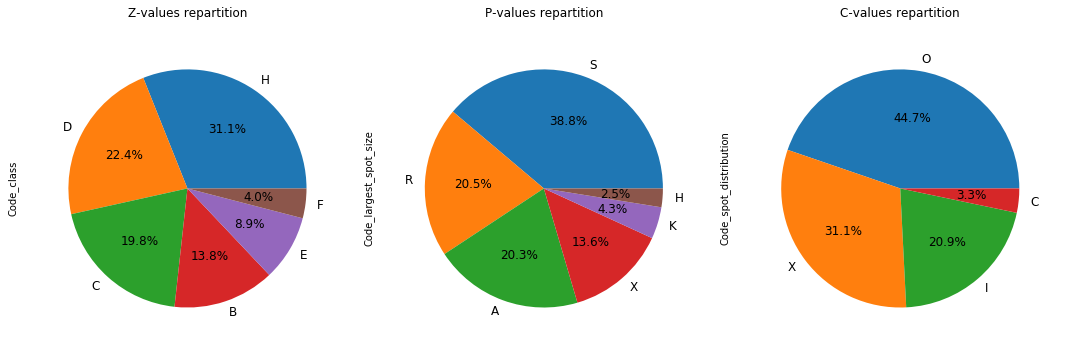

In [307]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

data2['Code_class'].value_counts().plot(ax=axes[0],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[0].set_title("Z-values repartition")

data2['Code_largest_spot_size'].value_counts().plot(ax=axes[1],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[1].set_title("P-values repartition")

data2['Code_spot_distribution'].value_counts().plot(ax=axes[2],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[2].set_title("C-values repartition")

plt.tight_layout()

This classification is called the McIntosh classification and is based on the general form "Zpc" where :<br>
-'Z' values represents the modified Zurich class <br>
-'P' values describes the penumbra of the principal spot <br>
-'C' values describes the distribution of spots in the interior of the group


We can notice that the most highest number of class for the 'zpc' form is respectively H, S and O <br>
-H represents an unipolar sunspot group with penumbra but relatively large <br>
-S means that the largest spot has mature, dark, filamentary penumbra of circular or elliptical shape with little irregularity to the border. It's size is rather medium<br>
-O implies that it's one of the smallest sunspot distribution but with multiple spots

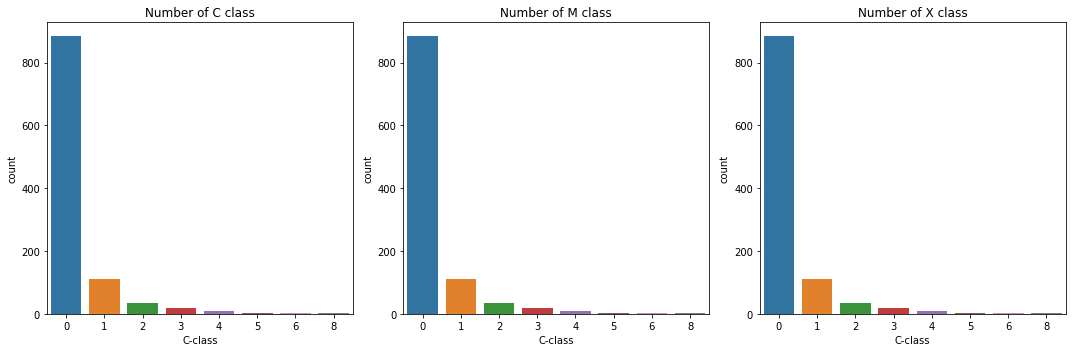

In [360]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.countplot(ax = axes[0], x="C-class",data=data2)
axes[0].set_title("Number of C class")

sns.countplot(ax = axes[1], x="C-class",data=data2)
axes[1].set_title("Number of M class")

sns.countplot(ax = axes[2], x="C-class",data=data2)
axes[2].set_title("Number of X class")

plt.tight_layout()

Here we're just trying to see if there's a noticeable difference between the proportion in number of the different classes

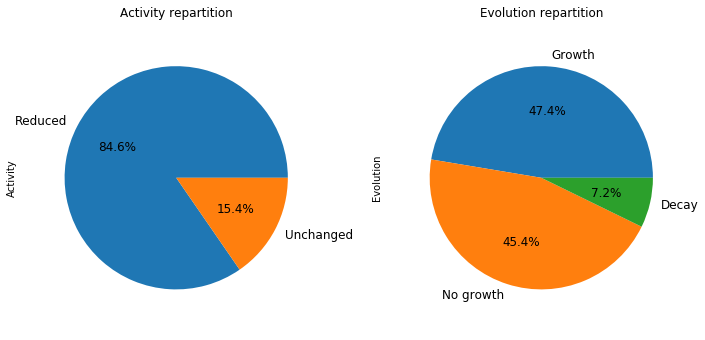

In [309]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

data2['Activity'].value_counts().plot(ax=axes[0],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[0].set_title("Activity repartition")

data2['Evolution'].value_counts().plot(ax=axes[1],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[1].set_title("Evolution repartition")

plt.tight_layout()

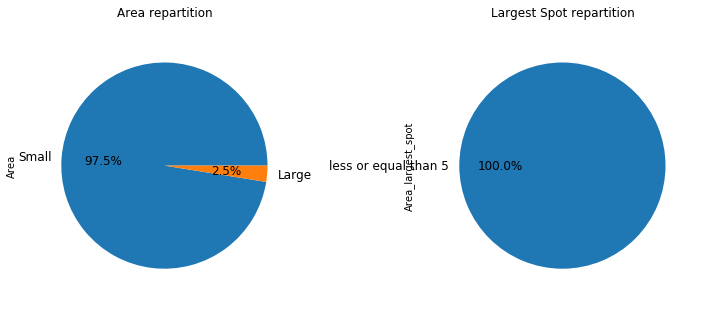

In [310]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

data2['Area'].value_counts().plot(ax=axes[0],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[0].set_title("Area repartition")

data2['Area_largest_spot'].value_counts().plot(ax=axes[1],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[1].set_title("Largest Spot repartition")

plt.tight_layout()

Not only most of the area covered by the solar flares is relatively small, there is not a single place where the area of the largest spot is greater than 5

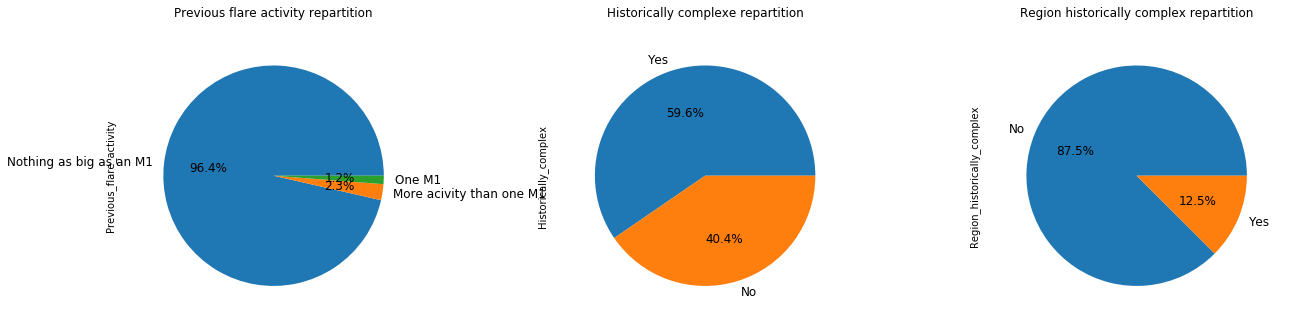

In [349]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

data2['Previous_flare_activity'].value_counts().plot(ax=axes[0],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[0].set_title("Previous flare activity repartition")

data2['Historically_complex'].value_counts().plot(ax=axes[1],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[1].set_title("Historically complexe repartition")

data2['Region_historically_complex'].value_counts().plot(ax=axes[2],kind='pie',subplots=True,startangle = 0 ,shadow = False
                          ,legend = False,autopct = '%1.1f%%', fontsize = 12
                          ,radius = 0.9,table = False)
axes[2].set_title("Region historically complex repartition")

plt.tight_layout()

## Relationship between variables

We will now try to see if there's any relationship linking the variables

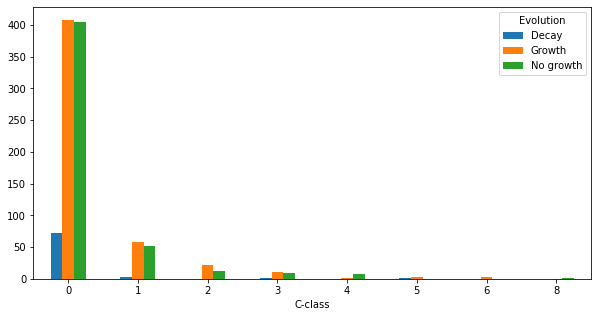

In [312]:
CrosstabResult=pd.crosstab(index=data2['C-class'],columns=data2['Evolution'])
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

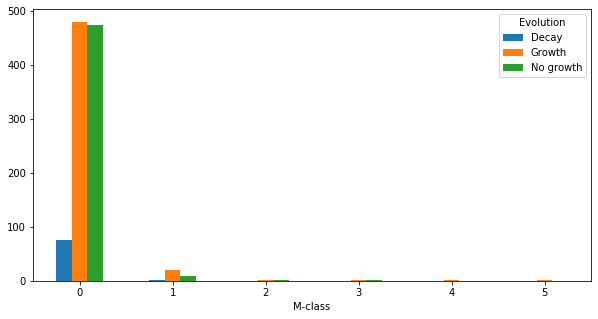

In [313]:
CrosstabResult=pd.crosstab(index=data2['M-class'],columns=data2['Evolution'])
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

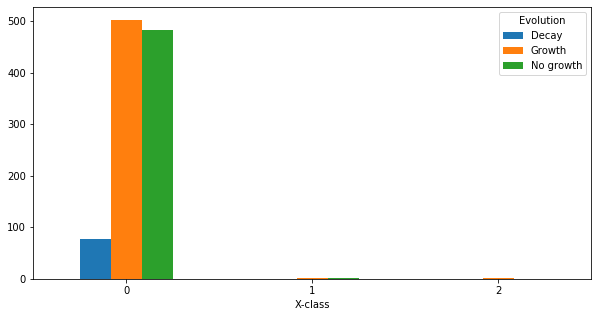

In [314]:
CrosstabResult=pd.crosstab(index=data2['X-class'],columns=data2['Evolution'])
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

We can notice a slight disproportion in the evolution of the region where there was 2 C-class spotted and the region where there was 1 M-class<br>
In both cases there is a majority of 'Growth' in the evolution section

In [315]:
data2[data2['M-class']=='1'].sort_values(by='Evolution')

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
1022,D,A,I,Reduced,Decay,Nothing as big as an M1,No,No,Small,less or equal than 5,1,1,0
37,E,A,C,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,3,1,0
1018,D,S,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,2,1,0
1009,E,K,C,Unchanged,Growth,Nothing as big as an M1,No,No,Large,less or equal than 5,2,1,0
830,D,A,I,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,0,1,0
819,D,A,I,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,1,0
701,E,H,I,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,1,1,0
700,F,A,I,Unchanged,Growth,Nothing as big as an M1,No,No,Large,less or equal than 5,1,1,0
589,C,S,O,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,1,0
501,E,S,I,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,5,1,0


In [316]:
data2[data2['C-class']=='2'].sort_values(by='Evolution')

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
26,D,A,I,Unchanged,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,2,0,0
885,D,S,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,2,2,0
860,D,K,I,Unchanged,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,0,0
835,H,S,X,Reduced,Growth,Nothing as big as an M1,Yes,Yes,Small,less or equal than 5,2,0,0
816,D,A,I,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,0,0
644,F,S,I,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,0,0
589,C,S,O,Reduced,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,1,0
452,E,A,I,Unchanged,Growth,Nothing as big as an M1,No,No,Small,less or equal than 5,2,0,0
362,D,K,I,Unchanged,Growth,One M1,No,No,Small,less or equal than 5,2,0,0
1009,E,K,C,Unchanged,Growth,Nothing as big as an M1,No,No,Large,less or equal than 5,2,1,0


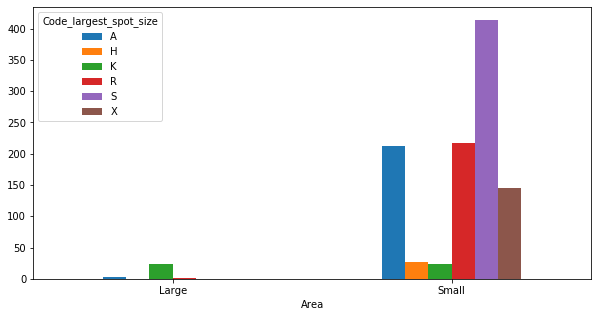

In [317]:
CrosstabResult=pd.crosstab(index=data2['Area'],columns=data2['Code_largest_spot_size'])
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

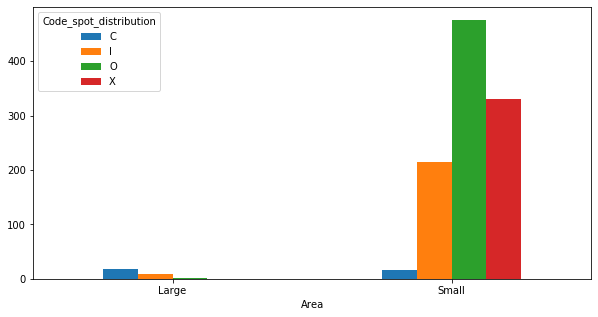

In [318]:
CrosstabResult=pd.crosstab(index=data2['Area'],columns=data2['Code_spot_distribution'])
CrosstabResult.plot.bar(figsize=(10,5), rot=0)

## Modelisation Prediction

We're going to see if we can predict how many C-class, M-class and X-class each region contains depending on the parameters.
In this case data are from the column "Code_class" to "Area_largest_spot" and the target are the 3 columns "C-class", "M-class" and "X-class"

Since the training data are categorical nominal values we'll need encode them using OneHotencoder and OrdinalEncoder

In [319]:
data2.head()

,Code_class,Code_largest_spot_size,Code_spot_distribution,Activity,Evolution,Previous_flare_activity,Historically_complex,Region_historically_complex,Area,Area_largest_spot,C-class,M-class,X-class
0,H,A,X,Reduced,Growth,Nothing as big as an M1,Yes,Yes,Small,less or equal than 5,0,0,0
1,D,R,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0
2,C,S,O,Reduced,Growth,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0
3,H,R,X,Reduced,No growth,Nothing as big as an M1,Yes,Yes,Small,less or equal than 5,0,0,0
4,H,S,X,Reduced,Decay,Nothing as big as an M1,Yes,No,Small,less or equal than 5,0,0,0


In [356]:
X = data2.iloc[:, :10]
y1 =data2.iloc[:, 10]
y2 =data2.iloc[:, 11]
y3 =data2.iloc[:, 12]

In [321]:
ohe = OneHotEncoder(sparse= False)
ohe.fit_transform(data2[["Activity", "Evolution", "Previous_flare_activity", "Historically_complex","Region_historically_complex","Area","Area_largest_spot"]])[:]
ohe.categories_

[array(['Reduced', 'Unchanged'], dtype=object),
 array(['Decay', 'Growth', 'No growth'], dtype=object),
 array(['More acivity than one M1', 'Nothing as big as an M1', 'One M1'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Large', 'Small'], dtype=object),
 array(['less or equal than 5'], dtype=object)]

In [322]:
oe = OrdinalEncoder(categories=[['A','B','C','D','E','F','H'],['X','R','S','A','H','K'],['X','O','I','C']])
oe.fit_transform(data2[['Code_class','Code_largest_spot_size','Code_spot_distribution']])
oe.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'H'], dtype=object),
 array(['X', 'R', 'S', 'A', 'H', 'K'], dtype=object),
 array(['X', 'O', 'I', 'C'], dtype=object)]

In [323]:
column_transform = make_column_transformer(
    (ohe, ["Activity", "Evolution", "Previous_flare_activity", "Historically_complex","Region_historically_complex","Area","Area_largest_spot"]),
    (oe, ['Code_class','Code_largest_spot_size','Code_spot_distribution']))

In [324]:
column_transform.fit_transform(X)[:]

array([[1., 0., 0., ..., 6., 3., 0.],
       [1., 0., 0., ..., 3., 1., 1.],
       [1., 0., 0., ..., 2., 2., 1.],
       ...,
       [1., 0., 0., ..., 2., 2., 1.],
       [1., 0., 0., ..., 6., 1., 0.],
       [1., 0., 1., ..., 1., 0., 1.]])

### Training and Test Split

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state = 42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state = 42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.3, random_state = 42)

print(X_train.shape, X_train2.shape, X_train3.shape)
print(X_test.shape, X_test2.shape, X_test3.shape)
print(y_train.shape, y_train2.shape, y_train3.shape)
print(y_test.shape, y_test2.shape, y_test3.shape)

(746, 10) (746, 10) (746, 10)
(320, 10) (320, 10) (320, 10)
(746,) (746,) (746,)
(320,) (320,) (320,)


### Linear regression

In [326]:
#Instantiate Pipeline with linear Regression
lm= LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [380]:
#Fit pipeline to training set and make predictions on test set

lm_pipeline.fit(X_train, y_train)
lm_predictions = lm_pipeline.predict(X_test)
print('First 5 LM predictions(C-class): ', pd.DataFrame(lm_predictions[:5]))


First 5 LM predictions(C-class):            0
0  0.018472
1  0.146782
2  0.071126
3  0.417559
4  0.145373


In [381]:
lm_pipeline.fit(X_train2, y_train2)
lm_predictions = lm_pipeline.predict(X_test)
print('First 5 LM predictions(M-class): ', pd.DataFrame(lm_predictions[:5]))

First 5 LM predictions(M-class):            0
0  0.008754
1 -0.016948
2  0.018749
3  0.053582
4  0.017597


In [382]:
lm_pipeline.fit(X_train3, y_train3)
lm_predictions = lm_pipeline.predict(X_test)
print('First 5 LM predictions(X-class): ', pd.DataFrame(lm_predictions[:5]))

First 5 LM predictions(X-class):            0
0 -0.001148
1  0.005444
2 -0.000424
3  0.005046
4 -0.000497


We can now evaluate the accuracy of the predictions using the mean absolute error (MAE) and the mean squared error (RMSE)

In [330]:
lm_mae = mean_absolute_error(lm_predictions, y_test)
lm_rmse = np.sqrt(mean_squared_error(lm_predictions, y_test))
print("C-class")
print("LM MAE: {:.2f}".format(round(lm_mae,2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse,2)))

C-class
LM MAE: 0.28
LM RMSE: 0.85


In [331]:
lm_mae = mean_absolute_error(lm_predictions, y_test2)
lm_rmse = np.sqrt(mean_squared_error(lm_predictions, y_test2))
print("M-class")
print("LM MAE: {:.2f}".format(round(lm_mae,2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse,2)))

M-class
LM MAE: 0.04
LM RMSE: 0.27


In [332]:
lm_mae = mean_absolute_error(lm_predictions, y_test3)
lm_rmse = np.sqrt(mean_squared_error(lm_predictions, y_test3))
print("X-class")
print("LM MAE: {:.2f}".format(round(lm_mae,2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse,2)))

X-class
LM MAE: 0.01
LM RMSE: 0.03


We can notice that only the predictions of the X-class can be considered as accurate using the linear regression

Let's try to make a prediction using a different model (now with a gradient Boosting regressor)

### Gradient Boosting Regressor

In [333]:
#Instantiate pipeline with gradient boosting

gbm = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)

In [383]:
gbm_pipeline.fit(X_train, y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print('First 5 GBM predictions(C-class): ', pd.DataFrame(gbm_predictions[:5]))

First 5 GBM predictions(C-class):            0
0  0.037785
1  0.078790
2  0.100362
3  0.364807
4  0.085915


In [384]:
gbm_pipeline.fit(X_train2, y_train2)
gbm_predictions = gbm_pipeline.predict(X_test)
print('First 5 GBM predictions(M-class): ', pd.DataFrame(gbm_predictions[:5]))

First 5 GBM predictions(M-class):            0
0 -0.008721
1 -0.003070
2  0.013753
3  0.067197
4  0.003520


In [385]:
gbm_pipeline.fit(X_train3, y_train3)
gbm_predictions = gbm_pipeline.predict(X_test)
print('First 5 GBM predictions(X-class): ', pd.DataFrame(gbm_predictions[:5]))

First 5 GBM predictions(X-class):            0
0 -0.000246
1 -0.001688
2 -0.000143
3 -0.000915
4 -0.000518


In [337]:
gbm_mae = mean_absolute_error(gbm_predictions, y_test)
gbm_rmse = np.sqrt(mean_squared_error(gbm_predictions, y_test))
print("C-class")
print("GBM MAE: {:.2f}".format(round(gbm_mae,2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse,2)))

C-class
GBM MAE: 0.28
GBM RMSE: 0.85


In [338]:
gbm_mae = mean_absolute_error(gbm_predictions, y_test2)
gbm_rmse = np.sqrt(mean_squared_error(gbm_predictions, y_test2))
print("M-class")
print("GBM MAE: {:.2f}".format(round(gbm_mae,2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse,2)))

M-class
GBM MAE: 0.04
GBM RMSE: 0.27


In [339]:
gbm_mae = mean_absolute_error(gbm_predictions, y_test3)
gbm_rmse = np.sqrt(mean_squared_error(gbm_predictions, y_test3))
print("X-class")
print("GBM MAE: {:.2f}".format(round(gbm_mae,2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse,2)))

X-class
GBM MAE: 0.01
GBM RMSE: 0.03


### Logistic regression

In [340]:
log= LogisticRegression(solver='lbfgs')
log_pipeline = make_pipeline(column_transform, log)

In [387]:
log_pipeline.fit(X_train, y_train)
log_predictions = log_pipeline.predict(X_test)
print('First 5 LOG predictions(C-class): ', pd.DataFrame(log_predictions[:5]))

First 5 LOG predictions(C-class):     0
0  0
1  0
2  0
3  0
4  0


C:\Users\Sebastien LIAO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [388]:
log_pipeline.fit(X_train2, y_train2)
log_predictions = log_pipeline.predict(X_test)
print('First 5 LOG predictions(C-class): ', pd.DataFrame(log_predictions[:5]))

First 5 LOG predictions(C-class):     0
0  0
1  0
2  0
3  0
4  0


C:\Users\Sebastien LIAO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [386]:
log_pipeline.fit(X_train3, y_train3)
log_predictions = log_pipeline.predict(X_test)
print('First 5 LOG predictions(C-class): ', pd.DataFrame(log_predictions[:5]))

First 5 LOG predictions(C-class):     0
0  0
1  0
2  0
3  0
4  0


C:\Users\Sebastien LIAO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [344]:
log_mae = mean_absolute_error(log_predictions, y_test)
log_rmse = np.sqrt(mean_squared_error(log_predictions, y_test))
print("C-class")
print("GBM MAE: {:.2f}".format(round(log_mae,2)))
print("GBM RMSE: {:.2f}".format(round(log_rmse,2)))

C-class
GBM MAE: 0.28
GBM RMSE: 0.86


In [345]:
log_mae = mean_absolute_error(log_predictions, y_test2)
log_rmse = np.sqrt(mean_squared_error(log_predictions, y_test2))
print("M-class")
print("GBM MAE: {:.2f}".format(round(log_mae,2)))
print("GBM RMSE: {:.2f}".format(round(log_rmse,2)))

M-class
GBM MAE: 0.03
GBM RMSE: 0.27


In [346]:
log_mae = mean_absolute_error(log_predictions, y_test3)
log_rmse = np.sqrt(mean_squared_error(log_predictions, y_test3))
print("X-class")
print("GBM MAE: {:.2f}".format(round(log_mae,2)))
print("GBM RMSE: {:.2f}".format(round(log_rmse,2)))

X-class
GBM MAE: 0.00
GBM RMSE: 0.00


The logistic regression seems to be the most accurate among the models